<a href="https://colab.research.google.com/github/saud-py/Web-Scraping-using-BeautifulSoup/blob/main/Real_Estate_web_scraping.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Web Scraping real estate data with BeautifulSoup

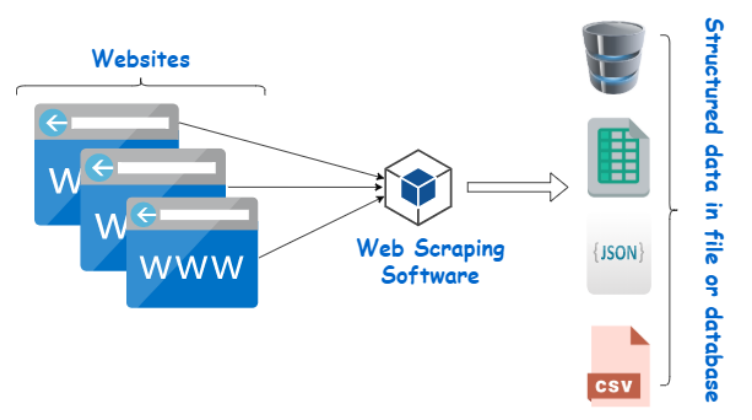

In [1]:
#Importing all the required libraries
import requests
import pandas as pd
from bs4 import BeautifulSoup

In [2]:
url = "https://www.seloger.com/list.htm?projects=2,5&types=2,1&natures=1,2,4&places=[{%22inseeCodes%22:[60088]}]&rooms=2&mandatorycommodities=0&enterprise=0&qsVersion=1.0&LISTING-LISTpg=1"

In [3]:
url = "https://www.seloger.com/list.htm?projects=2,5&types=2,1&natures=1,2,4&places=[{%22inseeCodes%22:[60088]}]&rooms=2&mandatorycommodities=0&enterprise=0&qsVersion=1.0&LISTING-LISTpg=2"

In [5]:
response = requests.get(url)
response

<Response [403]>

The user-agent is a browser in a web context and the purpose of using it is to fake the usaage of a browser on the computer. With this method, the website that we try to atttend using a user agent would'nt block because the user agent is considered a person using the browser

In [6]:
headers = {'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_10_1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/39.0.2171.95 Safari/537.36'}


In [7]:
response = requests.get(url, headers=headers)

We will be inspecting the webpage using the inspect element

The data will be gathering from the webpage is the following:


*   Price
*   Type of property 
*   Numbers of prices
*   Numbers of rooms
*   Size
*   Address
*   Real estate agency

When inspecting the web page, we see "div" that has the information on a particular property has the same class "value". The method is to dig deep using the mouse.


In [8]:
#The below is the script for the above theory
headers = {
    'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_10_1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/39.0.2171.95 Safari/537.36'}

response = requests.get(url, headers=headers)
soup = BeautifulSoup(response.text, "lxml")
list_all_ads = []
for element in soup.find_all('div', attrs={'class': 'ListContent-sc-1viyr2k-0 klbvnS '
                                                    'classified__ClassifiedContainer-sc-1wmlctl-0 dlUdTD '
                                                    'Card__CardContainer-sc-7insep-5 kLpWdA'}):
    price = element.find('div', attrs={'data-test': 'sl.price-label'}).text  # => price.text return the price value
    agency_link = element.find_all('div', {'class': 'Contact__ContentContainer-sc-3d01ca-2 cKwmCO'})
    for agency in agency_link:
        agency_name = agency.a.text
        agency_name_value = agency_name
    type = element.find('div', attrs={'data-test': 'sl.title'}).text

    address = element.find('div', attrs={'data-test': 'sl.address'}).text

    ul_tagsLine_0 = element.find('ul', attrs={'data-test': 'sl.tagsLine_0'})
    list_ul_tagsLine_0 = []
    for li in ul_tagsLine_0.find_all("li"):
        list_ul_tagsLine_0.append(li.text)
    numbers_of_pieces, rooms, size = getLiValue(list_ul_tagsLine_0)
    #print('\n')
    list_all_ads.append({"price": price, "agency_name": agency_name_value, "type":type, "address":address, "numbers_of_pieces":numbers_of_pieces, "rooms":rooms, "size":size})

In [9]:
#The above extracted data is stored in the dataframe
df_seloger = pd.DataFrame(list_all_ads)
df_seloger.to_csv('listings.csv', index = False, encoding = 'utf-8')